# Week 2: Linear Regression 2
Include concepts such as linear regression with lasso, ridge, and elastic net regression

In [1]:
# Standard Libraries
import os
import time
import math
import io
import zipfile
import requests
import kagglehub
from urllib.parse import urlparse
from itertools import chain, combinations
from collections import Counter
import re

# Data Science Libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as mticker
import seaborn as sns

# Scikit-learn (Machine Learning)
from sklearn.model_selection import (
    train_test_split, 
    cross_val_score, 
    GridSearchCV, 
    RandomizedSearchCV, 
    RepeatedKFold,
    RepeatedStratifiedKFold
)
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector, f_regression, SelectKBest
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn import decomposition
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline

# Progress Tracking
from tqdm import tqdm

# Language Processing
from textblob import TextBlob
from datetime import datetime, timedelta
import string

# globals
random_state = 42

In [2]:
def evaluate_logistic_models(X, y, max_iter=100, test_size=0.2):
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Define models with different penalties
    models = {
        "L2 (Ridge)": LogisticRegression(penalty='l2', solver='liblinear', max_iter=max_iter, C=0.5),
        "L1 (Lasso)": LogisticRegression(penalty='l1', solver='liblinear', max_iter=max_iter, C=0.5),
        "ElasticNet": LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=max_iter, C=0.5)
    }

    # Train and evaluate each model
    for name, model in models.items():
        # Pipeline with scaling
        pipeline = make_pipeline(StandardScaler(), model)
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"{name}:")
        print(f"  Accuracy: {acc:.2f}\n")

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:")
        print(cm)

        # Plot Confusion Matrix
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f"{name} - Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

## Dataset 1: Web Page Phishing Detection

In [3]:
# Load cleaned data
cleaned_webpage = pd.read_csv('cleaned_webpage.csv')
cleaned_webpage.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,legitimate
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,0,0,1,1,4,1
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,0
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,0
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,0,107721,0,0,3,1
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,1


In [4]:
# Separate features and target
webpage_features = cleaned_webpage.drop(columns=['legitimate'])
webpage_target = cleaned_webpage['legitimate']

L2 (Ridge):
  Accuracy: 0.96

Confusion Matrix:
[[1075   54]
 [  46 1111]]


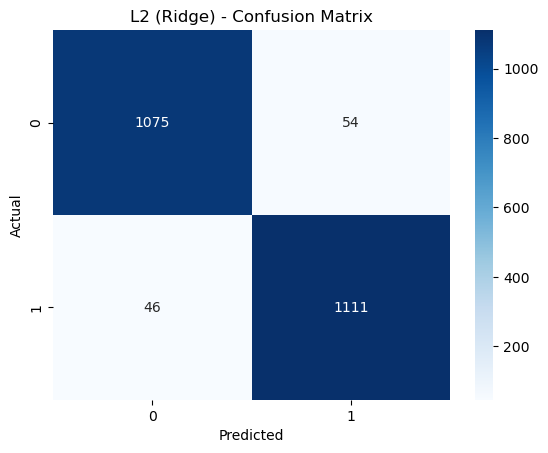

L1 (Lasso):
  Accuracy: 0.96

Confusion Matrix:
[[1074   55]
 [  46 1111]]


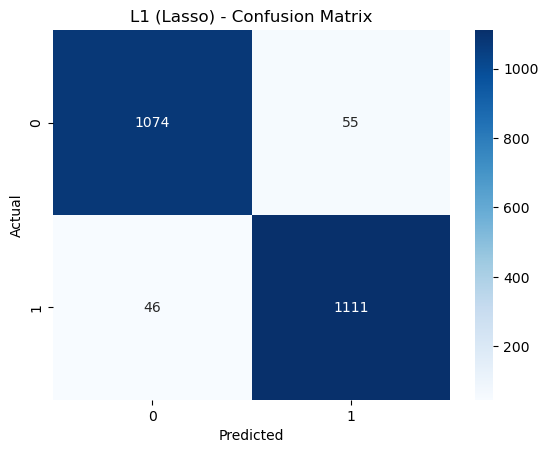

ElasticNet:
  Accuracy: 0.96

Confusion Matrix:
[[1076   53]
 [  46 1111]]


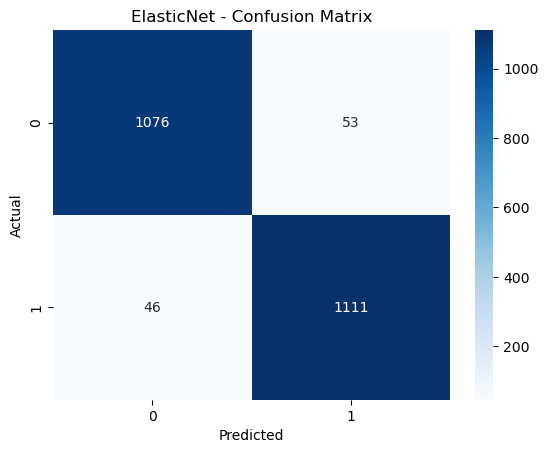

In [13]:
evaluate_logistic_models(webpage_features, webpage_target, test_size=0.2, max_iter=3000)

## Dataset 2: Phishing Email Detection

In [6]:
# Load cleaned data
cleaned_email = pd.read_csv('cleaned_phishing_email.csv')
cleaned_email.head()

,polarity,subjectivity,unique_words,char_count,word_count,uppercase_ratio,symbol_ratio,kw_urgent,kw_verify,kw_account,kw_click,kw_suspend,kw_update,kw_login,kw_confirm,currency_symbol_count,phone_number_count,Safe Email
0,0.201493,0.514213,110.0,1030.0,230.0,0.000000,0.059223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.009375,0.084375,53.0,479.0,91.0,0.000000,0.037578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.091540,0.515783,102.0,1245.0,305.0,0.000000,0.077108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.260069,0.690278,73.0,688.0,96.0,0.056686,0.162791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0
4,0.152579,0.505258,60.0,441.0,91.0,0.000000,0.061224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [7]:
# Separate features and target
email_features = cleaned_email.drop(columns=['Safe Email'])
email_target = cleaned_email['Safe Email']

L2 (Ridge):
  Accuracy: 0.72

Confusion Matrix:
[[ 613  753]
 [ 258 1990]]


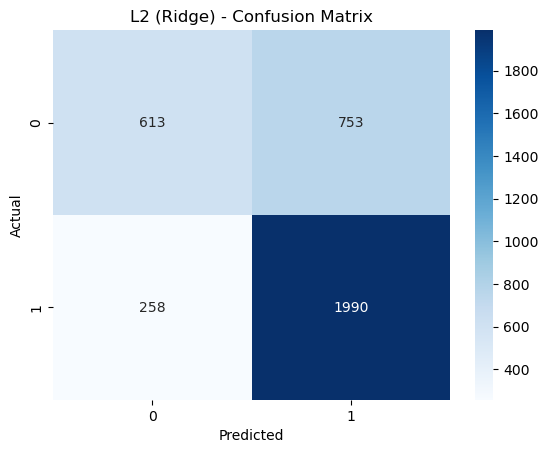

L1 (Lasso):
  Accuracy: 0.72

Confusion Matrix:
[[ 613  753]
 [ 256 1992]]


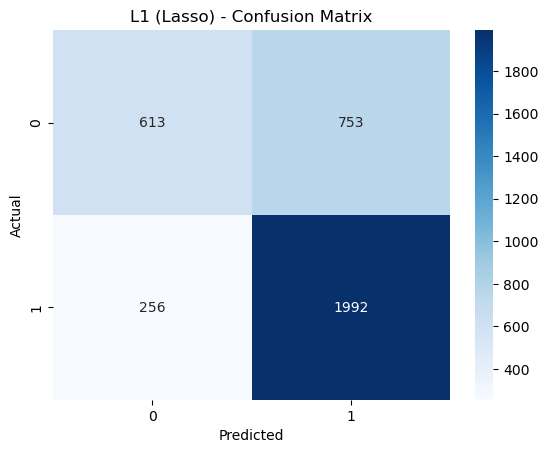

ElasticNet:
  Accuracy: 0.72

Confusion Matrix:
[[ 611  755]
 [ 257 1991]]


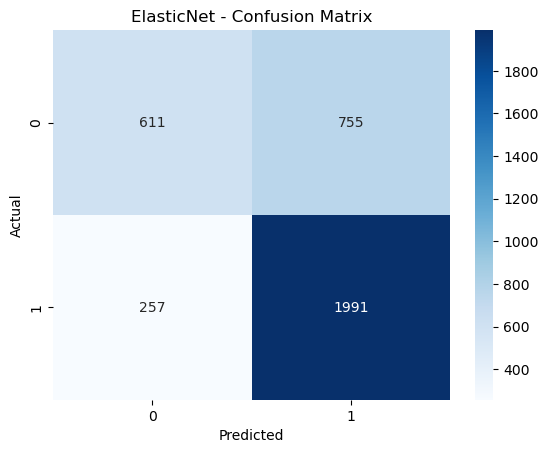

In [8]:
evaluate_logistic_models(email_features, email_target, test_size=0.2, max_iter=1000)

## Dataset 3: Credit Card Transactions Fraud Detection Dataset

In [9]:
# Load cleaned data
cleaned_credit_card = pd.read_csv('cleaned_credit_card.csv')
cleaned_credit_card.head()

,category,amt,gender,city,state,lat,long,city_pop,job,unix_time,merch_lat,merch_long,age,max_repeats,is_fraud
0,0,2.86,0,0,0,33.9659,-80.9355,333497,0,1371816865,33.986391,-81.200714,57,3,0
1,0,29.84,1,1,1,40.3207,-110.4360,302,1,1371816873,39.450498,-109.960431,35,4,0
2,1,41.28,1,2,2,40.6729,-73.5365,34496,2,1371816893,40.495810,-74.196111,54,4,0
3,2,60.05,0,3,3,28.5697,-80.8191,54767,3,1371816915,28.812398,-80.883061,38,4,0
4,3,3.19,0,4,4,44.2529,-85.0170,1126,4,1371816917,44.959148,-85.884734,70,3,0


In [10]:
# Separate features and target
credit_features = cleaned_credit_card.drop(columns=['is_fraud'])
credit_target = cleaned_credit_card['is_fraud']

L2 (Ridge):
  Accuracy: 0.99

Confusion Matrix:
[[368408    174]
 [  1897      0]]


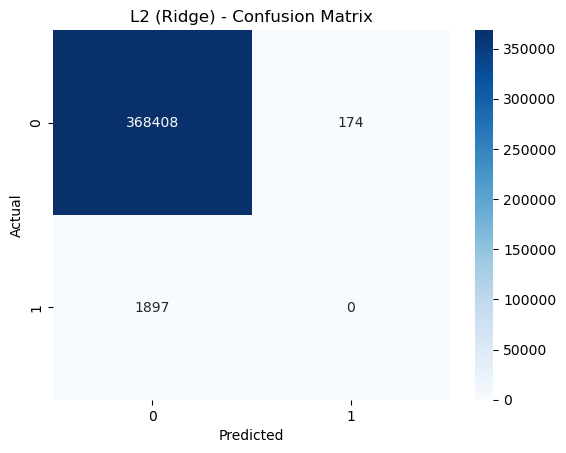

L1 (Lasso):
  Accuracy: 0.99

Confusion Matrix:
[[368408    174]
 [  1897      0]]


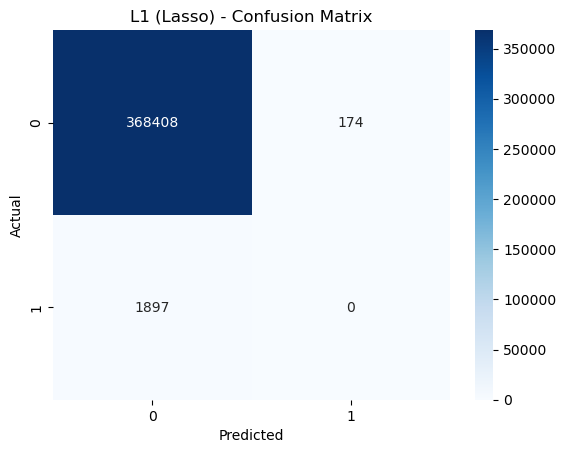

ElasticNet:
  Accuracy: 0.99

Confusion Matrix:
[[368408    174]
 [  1897      0]]


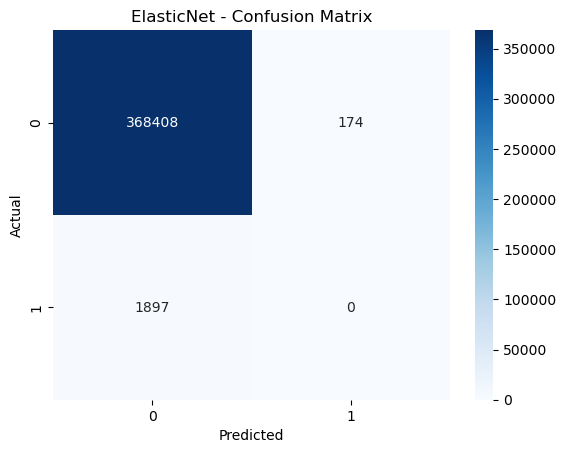

In [11]:
evaluate_logistic_models(credit_features, credit_target, test_size=0.2, max_iter=2000)